#### Latent Dirichlet Allocation (LDA)를 이용한 뉴스 데이터 클러스터링
sklearn 패키지를 이용한다.

In [1]:
import numpy as np
import re
import pickle
from nltk.corpus import stopwords
#from sklearn.datasets import fetch_20newsgroups

In [2]:
#newsData = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))

In [3]:
#with open('./data/news.data', 'wb') as f:
#    pickle.dump(newsData , f, pickle.HIGHEST_PROTOCOL)

In [4]:
with open('./data/news.data', 'rb') as f:
    newsData  = pickle.load(f)

In [5]:
news = newsData.data
print(len(news))
print(news[0])

11314
Well i'm not sure about the story nad it did seem biased. What
I disagree with is your statement that the U.S. Media is out to
ruin Israels reputation. That is rediculous. The U.S. media is
the most pro-israeli media in the world. Having lived in Europe
I realize that incidences such as the one described in the
letter have occured. The U.S. media as a whole seem to try to
ignore them. The U.S. is subsidizing Israels existance and the
Europeans are not (at least not to the same degree). So I think
that might be a reason they report more clearly on the
atrocities.
	What is a shame is that in Austria, daily reports of
the inhuman acts commited by Israeli soldiers and the blessing
received from the Government makes some of the Holocaust guilt
go away. After all, look how the Jews are treating other races
when they got power. It is unfortunate.



In [6]:
print(newsData.target_names)
print(len(newsData.target_names))

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
20


#### preprocessing
영문자가 아닌 문자를 제거한다.

In [7]:
news1 = []
for doc in news:
    news1.append(re.sub("[^a-zA-Z]", " ", doc))

불용어를 제거하고, 모든 단어를 소문자로 변환하고, 길이가 3 이하인 단어를 제거한다.

In [8]:
stop_words = stopwords.words('english')
news2 = []
for doc in news1:
    doc1 = []
    for w in doc.split():
        w = w.lower()
        if len(w) > 3 and w not in stop_words:
            doc1.append(w)
    news2.append(' '.join(doc1))

In [9]:
print(news2[0])

well sure story seem biased disagree statement media ruin israels reputation rediculous media israeli media world lived europe realize incidences described letter occured media whole seem ignore subsidizing israels existance europeans least degree think might reason report clearly atrocities shame austria daily reports inhuman acts commited israeli soldiers blessing received government makes holocaust guilt away look jews treating races power unfortunate


#### TF-IDF matrix 생성

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
tf_vector = TfidfVectorizer(max_features = 500)

In [12]:
tfidf = tf_vector.fit_transform(news2)

In [13]:
print(tfidf.shape)
#print(tfidf[0].toarray()[0])

(11314, 500)


In [14]:
vocab = tf_vector.get_feature_names()

In [15]:
print(vocab[:20])

['able', 'access', 'actually', 'address', 'advance', 'agree', 'allow', 'almost', 'already', 'also', 'although', 'always', 'american', 'among', 'anonymous', 'another', 'answer', 'anti', 'anybody', 'anyone']


#### Latent Dirichlet Allocation (LDA)

In [16]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [17]:
model = LDA(n_components = len(newsData.target_names), learning_method='online', evaluate_every=5, max_iter=20, verbose=1)

#### Fitting and transform
- Return 값이 Document-Topic distribution이다.
- iteration 횟수가 max_iter까지 가면 아직 수렴하지 않은 것이다.
- 아직 수렴하지 않은 경우 mat_iter를 증가시켜야 한다.
- mat_iter를 증가시켜도 수렴하지 못하는 경우는 preprocessing 등을 좀 더 정밀하게 해야 한다.
- perplexity는 감소해야 한다.

In [18]:
doc_topic = model.fit_transform(tfidf)
doc_topic.shape

iteration: 1 of max_iter: 20
iteration: 2 of max_iter: 20
iteration: 3 of max_iter: 20
iteration: 4 of max_iter: 20
iteration: 5 of max_iter: 20, perplexity: 1607.4354
iteration: 6 of max_iter: 20
iteration: 7 of max_iter: 20
iteration: 8 of max_iter: 20
iteration: 9 of max_iter: 20
iteration: 10 of max_iter: 20, perplexity: 1605.5685
iteration: 11 of max_iter: 20
iteration: 12 of max_iter: 20
iteration: 13 of max_iter: 20
iteration: 14 of max_iter: 20
iteration: 15 of max_iter: 20, perplexity: 1605.8803
iteration: 16 of max_iter: 20
iteration: 17 of max_iter: 20
iteration: 18 of max_iter: 20
iteration: 19 of max_iter: 20
iteration: 20 of max_iter: 20, perplexity: 1606.6673


(11314, 20)

#### Topic-Term distribution

In [19]:
topic_term = model.components_
topic_term.shape

(20, 500)

#### Topic별로 문서 분류
doc_topic 행렬에서 가장 큰 colume을 선택한다. Colume에 topic의 score가 부여돼 있다.

In [20]:
doc_topic[0:1, :]

array([[0.01044057, 0.01044057, 0.01044057, 0.01044057, 0.01044057,
        0.01044057, 0.01044057, 0.01044057, 0.01044057, 0.01044057,
        0.01044057, 0.01044057, 0.80162914, 0.01044057, 0.01044057,
        0.01044057, 0.01044057, 0.01044057, 0.01044057, 0.01044057]])

In [21]:
np.sum(doc_topic[0:1, :])

1.0

<BarContainer object of 20 artists>

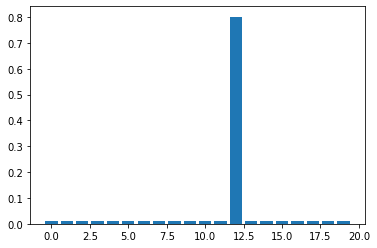

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(np.arange(0, 20), doc_topic[0:1, :][0])

In [23]:
for i in range(10):
    print('문서-{:d} : topic = {:d}'.format(i+1, np.argmax(doc_topic[i:(i+1), :][0])+1))

문서-1 : topic = 13
문서-2 : topic = 13
문서-3 : topic = 13
문서-4 : topic = 16
문서-5 : topic = 20
문서-6 : topic = 6
문서-7 : topic = 10
문서-8 : topic = 13
문서-9 : topic = 16
문서-10 : topic = 19


#### topic_term 행렬에서 topic 별로 중요 단어를 표시한다

In [24]:
for i in range(len(topic_term)):
    idx = np.flipud(topic_term[i].argsort())[:10]
    print('토픽-{:2d} : '.format(i+1), end='')
    for n in idx:
        print('{:s} '.format(vocab[n]), end='')
    print()

토픽- 1 : thanks please anyone mail know looking email advance send info 
토픽- 2 : lost april rules matter little country world game life section 
토픽- 3 : internet thought answer sound question love says small days usually 
토픽- 4 : stuff name software sorry work available well quite probably would 
토픽- 5 : drive drives disk hard problems scsi computer controller system problem 
토픽- 6 : article like least think wrong many would long know good 
토픽- 7 : card monitor video board apple memory posting subject reading david 
토픽- 8 : like nice heard called would believe actually effect think something 
토픽- 9 : mark word jesus read later issue bible rather christian correct 
토픽-10 : windows file window files program version using graphics software code 
토픽-11 : sale offer price sell best call original package book includes 
토픽-12 : games game part hell mean instead exist maybe simply though 
토픽-13 : people would think true israel believe evidence like know jesus 
토픽-14 : team year game last player

In [25]:
topic_term = topic_term / np.sum(topic_term, axis=1).reshape(20,1)

In [26]:
np.sum(topic_term[0])

0.9999999999999999

<BarContainer object of 500 artists>

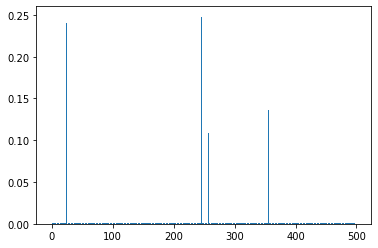

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(np.arange(0, 500), topic_term[1])